
    
### Fuzzy Logic in VANNET Context Aware Congested Road and Automatic Crash Noification

Sebuah perancangan sistem pemberitahuan / peringatan kemacetan pada jalan raya menggunakan metode fuzzy logic.

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Fuzzyfikasi Density (kepadatan) :

Density (Kepadatan) memiliki rentang 0 - 100 veh/km :

In [3]:
density = ctrl.Antecedent(np.arange(0,100,1),'density')
density_x = np.arange(0,100,1) #untuk plotting saja

Untuk density ,Fungsi keanggotaannya terdiri dari 3 value :

- Tinggi (>60 veh/km)
- Sedang (40-60 veh/km)
- Rendah (20-40 veh/km)

dengan fungsi keanggotaan :
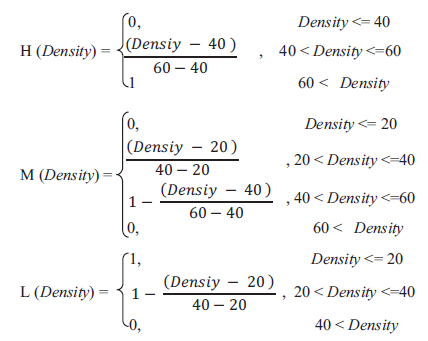


In [4]:
density['rendah'] = fuzz.trapmf(density.universe,[0,0,20,40]) #20-40 veh/km
density['sedang'] = fuzz.trimf(density.universe,[20,40,60]) #dari 30-50 veh/km
density['tinggi'] = fuzz.trapmf(density.universe,[40,60,100,100])#dari 40-60 veh/km

# Ploting Membership Function density

Plotting fungsi keanggotaan 𝜇DensityRendah(𝑥)

Text(0.5, 1.0, 'density rendah')

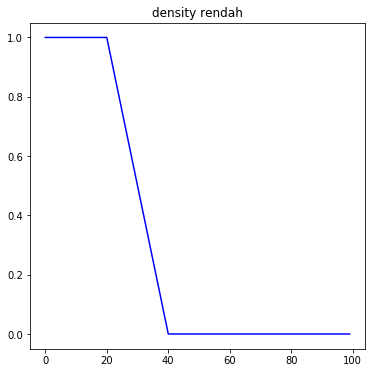

In [5]:
density_rendah = fuzz.trapmf(density_x,[0,0,20,40])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(density_x,density_rendah,'blue')
ax0.set_title('density rendah')

Plotting fungsi keanggotaan 𝜇DensitySedang(𝑥)

Text(0.5, 1.0, 'density sedang')

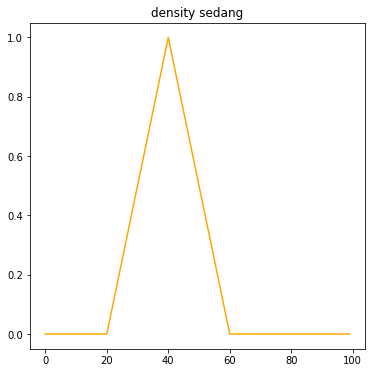

In [6]:
density_sedang = fuzz.trimf(density_x,[20,40,60])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(density_x,density_sedang,'orange')
ax0.set_title('density sedang')

Plotting fungsi keanggotaan 𝜇DensityTinggi(𝑥)

Text(0.5, 1.0, 'density tinggi')

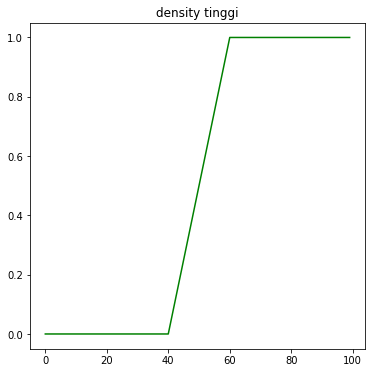

In [7]:
density_tinggi = fuzz.trapmf(density_x,[40,60,100,100])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(density_x,density_tinggi,'green')
ax0.set_title('density tinggi')

Plotting ke tiga fungsi keanggotaan density

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


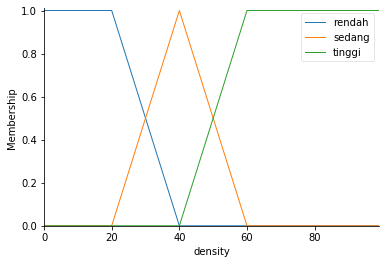

In [8]:
density.view()

# Fuzzyfikasi Speed (Kecepatan) :

untuk Speed memiliki rentang 0-100 km/h

In [9]:
speed = ctrl.Antecedent(np.arange(0,100,1),'speed')
speed_x = np.arange(0,100,1) #untuk plotting saja

untuk Speed fungsi keanggotaanya terdiri dari 3 value :

- Lambat (20-40 km/h)
- Sedang (40-60 km/h)
- Cepat  (>60 km/h)

dengan fungsi keanggotaan :
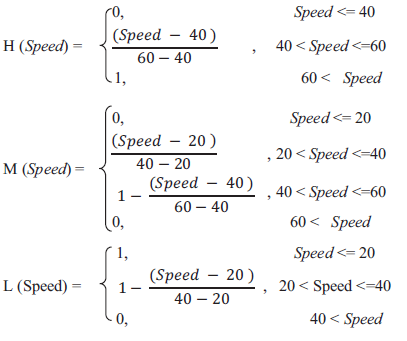
    


In [10]:
speed['lambat'] = fuzz.trapmf(speed.universe,[0,0,20,40]) #20-40 km/h
speed['sedang'] = fuzz.trimf(speed.universe,[20,40,60]) #dari 40-60 km/h
speed['cepat'] = fuzz.trapmf(speed.universe,[40,60,100,100])#dari >60 km/h

# Ploting Membership Function Speed

Plotting fungsi keanggotaan 𝜇SpeedLambat(𝑥)

Text(0.5, 1.0, 'speed lambat')

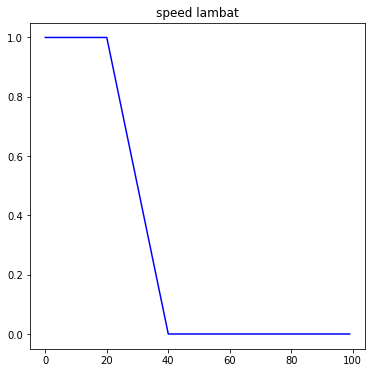

In [11]:
speed_lambat = fuzz.trapmf(speed_x,[0,0,20,40])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(speed_x,speed_lambat,'blue')
ax0.set_title('speed lambat')

Plotting fungsi keanggotaan 𝜇SpeedSedang(𝑥)

Text(0.5, 1.0, 'speed sedang')

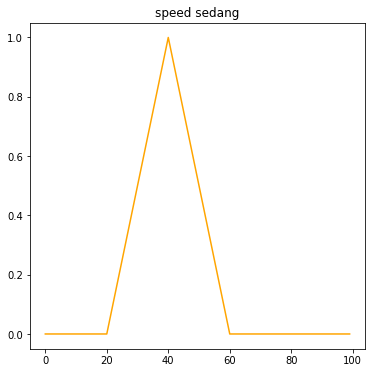

In [12]:
speed_sedang = fuzz.trimf(speed_x,[20,40,60])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(speed_x,speed_sedang,'orange')
ax0.set_title('speed sedang')

Plotting fungsi keanggotaan 𝜇SpeedCepat(𝑥)

Text(0.5, 1.0, 'speed cepat')

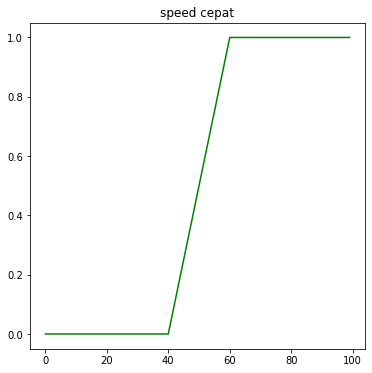

In [13]:
speed_cepat = fuzz.trapmf(speed_x,[40,60,100,100])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(speed_x,speed_cepat,'green')
ax0.set_title('speed cepat')

Plotting ke tiga fungsi keanggotaan speed

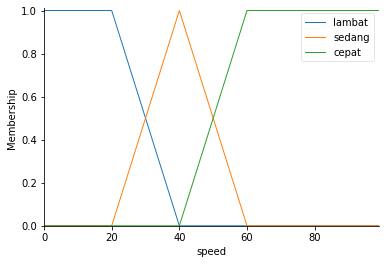

In [14]:
speed.view()

# Fuzzyfikasi output congestion (kemacetan)

untuk rentang congestion 0 - 100 menit 

In [15]:
congestion = ctrl.Consequent(np.arange(0,100,1),'congestion')
congestion_x = np.arange(0,100,1) #untuk plotting saja

ouput Congestion (kemacetan) terdiri dari 5 value :
- Sangat Tinggi ( >70 menit )
- Tinggi ( 40 - 70 menit )
- Sedang ( 20 - 50 menit )
- rendah ( 10 - 30 menit )
- sangat rendah ( <15 menit )

Dengan Fungsi keanggotaan :


Dengan fungsi keanggotaan suhu udara

\begin{equation}
  Congestion['VL'] = \mu CongestionVL(x)=\begin{cases}
    1, & \text{$0\leq x \leq 5$}.\\
    \left.(15 - x) \,  \right/(15 - 5) , & \text{$5 \leq x \leq 15$}.\\
    0, & \text{$x\geq 15$}.
  \end{cases}
  \\
    Congestion['L'] = \mu CongestionL(x)=\begin{cases}
    0, & \text{$x\leq 10$ atau $x\geq30$}.\\
    \left.(x - 10)\, \right/(20 - 10) , & \text{$10 \leq x \leq 20$}.\\
    \left.(30 - x)\, \right/(30 - 20) , & \text{$20 \leq x \leq 30$}.\\
  \end{cases}
    \\
    Congestion['M'] = \mu CongestionM(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq50$}.\\
    \left.(x - 20)\, \right/(35 - 20) , & \text{$20 \leq x \leq 35$}.\\
    \left.(50 - x)\, \right/(50 - 35) , & \text{$35 \leq x \leq 50$}.\\
  \end{cases}
      \\
    Congestion['H'] = \mu CongestionH(x)=\begin{cases}
    0, & \text{$x\leq 40$ atau $x\geq70$}.\\
    \left.(x - 40)\, \right/(55 - 40) , & \text{$40 \leq x \leq 55$}.\\
    \left.(70 - x)\, \right/(70 - 55) , & \text{$55 \leq x \leq 70$}.\\
  \end{cases}
  \\
  Congestion['VH'] = \mu CongestionVH(x)=\begin{cases}
    0, & \text{$x \leq 60$}.\\
    \left.(x - 60) \,  \right/(70 - 60) , & \text{$60 \leq x \leq 70$}.\\
    1, & \text{$x\geq 70$}.
  \end{cases}
\end{equation}



In [16]:
congestion['sangat rendah'] = fuzz.trapmf(congestion.universe,[0,0,5,15]) # <15 menit
congestion['rendah'] = fuzz.trimf(congestion.universe,[10,20,30]) #10-30 menit
congestion['sedang'] = fuzz.trimf(congestion.universe,[20,35,50]) #20-50 menit
congestion['tinggi'] = fuzz.trimf(congestion.universe,[40,55,70]) #40-70 menit
congestion['sangat tinggi'] = fuzz.trapmf(congestion.universe,[60,70,100,100]) # >70 menit

# Ploting Membership Function Congestion

Plotting fungsi keanggotaan 𝜇CongestionSangatRendah(𝑥)

Text(0.5, 1.0, 'congestion sangat rendah')

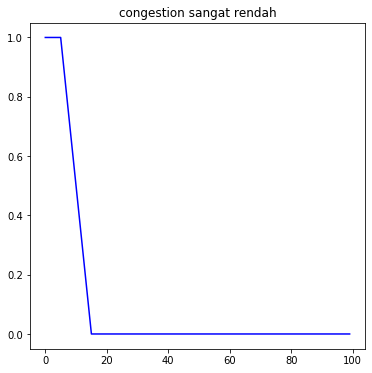

In [17]:
congestion_sangat_rendah = fuzz.trapmf(congestion_x,[0,0,5,15])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(congestion_x,congestion_sangat_rendah,'blue')
ax0.set_title('congestion sangat rendah')

Plotting fungsi keanggotaan 𝜇CongestionRendah(𝑥)

Text(0.5, 1.0, 'congestion rendah')

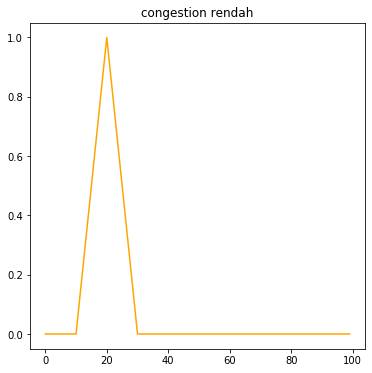

In [18]:
congestion_rendah = fuzz.trimf(congestion_x,[10,20,30])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(congestion_x,congestion_rendah,'orange')
ax0.set_title('congestion rendah')

Plotting fungsi keanggotaan 𝜇CongestionSedang(𝑥)

Text(0.5, 1.0, 'congestion sedang')

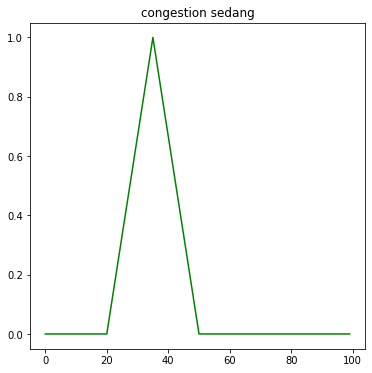

In [19]:
congestion_sedang = fuzz.trimf(congestion_x,[20,35,50])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(congestion_x,congestion_sedang,'green')
ax0.set_title('congestion sedang')

Plotting fungsi keanggotaan 𝜇CongestionTinggi(𝑥)

Text(0.5, 1.0, 'congestion tinggi')

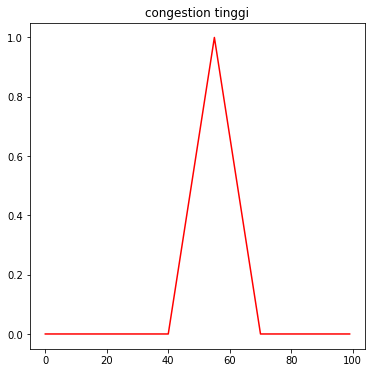

In [20]:
congestion_tinggi = fuzz.trimf(congestion_x,[40,55,70])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(congestion_x,congestion_tinggi,'red')
ax0.set_title('congestion tinggi')

Plotting fungsi keanggotaan 𝜇CongestionSangatTinggi(𝑥)

Text(0.5, 1.0, 'congestion sangat tinggi')

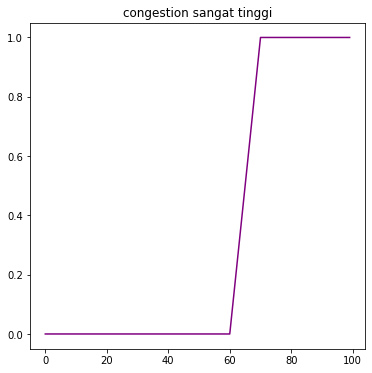

In [21]:
congestion_sangat_tinggi = fuzz.trapmf(congestion_x,[60,70,100,100])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(congestion_x,congestion_sangat_tinggi,'purple')
ax0.set_title('congestion sangat tinggi')

Plotting ke lima fungsi keanggotaan congestion

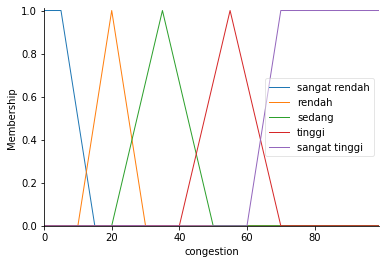

In [22]:
congestion.view()

# Inferencing
Pada tahap inferencing, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....

Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel density yang berjumlah 3 dan fuzzifikasi dari variabel speed yang berjumlah 3, maka rule yang dibuat berjumlah 3 x 3 = 9 rule

In [23]:
rule1 = ctrl.Rule(density['tinggi'] & speed['lambat'], congestion['sangat tinggi'])
rule2 = ctrl.Rule(density['sedang'] & speed['lambat'], congestion['tinggi'])
rule3 = ctrl.Rule(density['tinggi'] & speed['sedang'], congestion['tinggi'])
rule4 = ctrl.Rule(density['sedang'] & speed['sedang'], congestion['sedang'])
rule5 = ctrl.Rule(density['tinggi'] & speed['cepat'], congestion['sedang'])
rule6 = ctrl.Rule(density['rendah'] & speed['lambat'], congestion['rendah'])
rule7 = ctrl.Rule(density['rendah'] & speed['sedang'], congestion['rendah'])
rule8 = ctrl.Rule(density['sedang'] & speed['cepat'], congestion['rendah'])
rule9 = ctrl.Rule(density['rendah'] & speed['cepat'], congestion['sangat rendah'])

# RULE EVALUATION

In [24]:
pemberitahuan_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

# DEFUZZIFIKASI

In [25]:
pemberitahuann = ctrl.ControlSystemSimulation(pemberitahuan_ctrl)

kita masukan input density = 50 dan speed = 30

In [26]:
pemberitahuann.input['density'] = 50
pemberitahuann.input['speed'] = 30

Melakukan perhitungan defuzzifikasi

In [27]:
pemberitahuann.compute()

Mencetak hasil output defuzzifikasi

In [28]:
print(pemberitahuann.output['congestion'])

61.51910112359549


Plotting fungsi keangggotaan density setelah dimasukkan input nilai pada density

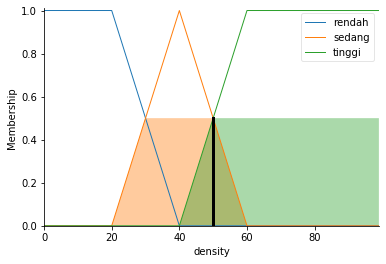

In [29]:
density.view(sim=pemberitahuann)

Plotting fungsi keangggotaan speed setelah dimasukkan input nilai pada speed

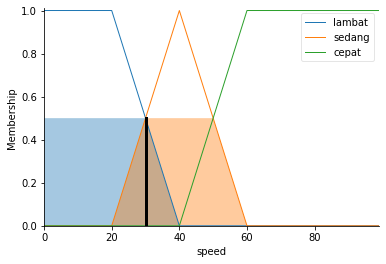

In [30]:
speed.view(sim=pemberitahuann)

Plotting fungsi keangggotaan congestion setelah dilakukan perhitungan defuzzifikasi output nilai pada congestion

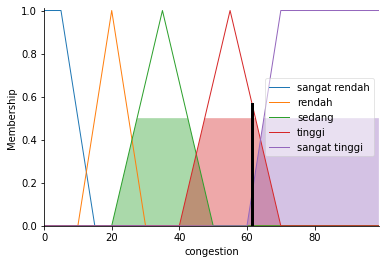

In [31]:
congestion.view(sim=pemberitahuann)

# Perhitungan Manual

<h3><center>Density = 50 </center></h3>

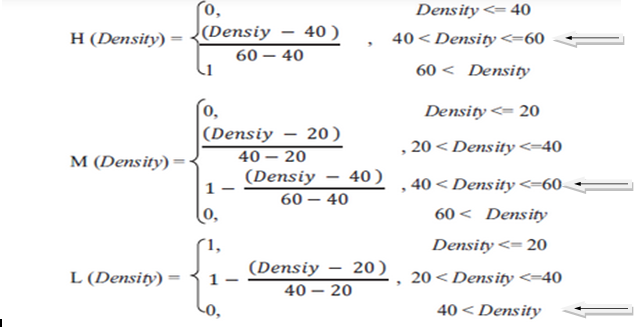

\begin{equation}
    \mu Density H(50) = (50 - 40) / (60 - 40) \\
    \mu Density H(50) = 10/20 \\ 
    \mu Density H(50) = 0.5 \\
    \mu Density M(50) = (50 - 40) / (60-40) \\
    \mu Density M(50) = 10/20 \\ 
    \mu Density M(50) = 0.5 \\
    \mu Density L(50) = 0 \\
\end{equation}

<h3><center>Speed = 30 </center></h3>

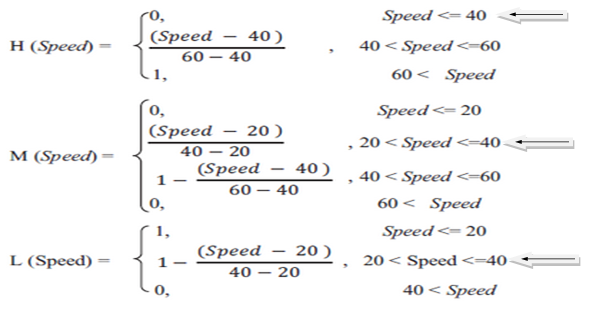

\begin{equation}
    \mu Speed H(30) = 0 \\
    \mu Speed M(30) = (30 - 20) / (40 - 20) \\
    \mu Speed M(30) = 10/20 \\ 
    \mu Speed M(30) = 0.5 \\
    \mu Speed L(30) = (30 - 20) / (40-20) \\
    \mu Speed L(30) = 10/20 \\ 
    \mu Speed L(30) = 0.5 \\
\end{equation}

# Fungsi Implikasi

Lalu kita cari nilai z untuk setiap aturan dengan menggunakan fungsi MIN karena menggunakan rule AND

1 IF Density H AND Speed H THEN Congestion M

$$ \\ \alpha(predikat_1) = \mu Density H \cap \mu Speed H $$
$$\alpha(predikat_1)   = min (\mu Density H[50], \mu Speed H [30]) $$
$$ \alpha(predikat_1) = min (0.5 ; 0) $$
$$ \alpha(predikat_1) = 0 $$

Maka nilai $ Z_1 = 0 $

=================================================================================================================

2 IF Density H AND Speed M THEN Congestion H

$$ \\ \alpha(predikat_2) = \mu Density H \cap \mu Speed M $$
$$\alpha(predikat_2)   = min (\mu Density H[50], \mu Speed M [30]) $$
$$ \alpha(predikat_2) = min (0.5 ; 0.5) $$
$$ \alpha(predikat_2) = 0.5 $$

Lalu lihat himpunan Congestion H
$$
 Congestion['H'] = \mu CongestionH(x)=\begin{cases}
    0, & \text{$x\leq 40$ atau $x\geq70$}.\\
    \left.(x - 40)\, \right/(55 - 40) , & \text{$40 \leq x \leq 55$}.\\
    \left.(70 - x)\, \right/(70 - 55) , & \text{$55 \leq x \leq 70$}.\\
  \end{cases}
$$
Didapatkan nilai 47.5 dan 77.5

Maka nilai $ Z_2 = 47.5 $

=================================================================================================================

3 IF Density H AND Speed L THEN Congestion VH

$$ \\ \alpha(predikat_3) = \mu Density H \cap \mu Speed L $$
$$\alpha(predikat_3)   = min (\mu Density H[50], \mu Speed L [30]) $$
$$ \alpha(predikat_3) = min (0.5 ; 0.5) $$
$$ \alpha(predikat_3) = 0.5 $$

Lalu lihat himpunan Congestion VH
$$
  Congestion['VH'] = \mu CongestionVH(x)=\begin{cases}
    0, & \text{$x \leq 60$}.\\
    \left.(x - 60) \,  \right/(70 - 60) , & \text{$60 \leq x \leq 70$}.\\
    1, & \text{$x\geq 70$}.
  \end{cases}
$$
Didapatkan nilai 65

Maka nilai $ Z_3 = 65 $

=================================================================================================================

4 IF Density M AND Speed H THEN Congestion L

$$ \\ \alpha(predikat_4) = \mu Density M \cap \mu Speed L $$
$$\alpha(predikat_4)   = min (\mu Density M[50], \mu Speed L [30]) $$
$$ \alpha(predikat_4) = min (0.5 ; 0) $$
$$ \alpha(predikat_4) = 0 $$

Maka nilai $ Z_4 = 0 $

=================================================================================================================

5 IF Density M AND Speed M THEN Congestion M

$$ \\ \alpha(predikat_5) = \mu Density M \cap \mu Speed M $$
$$\alpha(predikat_5)   = min (\mu Density M[50], \mu Speed M [30]) $$
$$ \alpha(predikat_5) = min (0.5 ; 0.5) $$
$$ \alpha(predikat_5) = 0.5 $$

Lalu lihat himpunan Congestion M
$$
    Congestion['M'] = \mu CongestionM(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq50$}.\\
    \left.(x - 20)\, \right/(35 - 20) , & \text{$20 \leq x \leq 35$}.\\
    \left.(50 - x)\, \right/(50 - 35) , & \text{$35 \leq x \leq 50$}.\\
  \end{cases}
$$
Didapatkan nilai 27.5 dan 42.5

Maka nilai $ Z_5 = 27.5 $

=================================================================================================================

6 IF Density M AND Speed L THEN Congestion H

$$ \\ \alpha(predikat_6) = \mu Density M \cap \mu Speed L $$
$$\alpha(predikat_6)   = min (\mu Density M[50], \mu Speed L [30]) $$
$$ \alpha(predikat_6) = min (0.5 ; 0.5) $$
$$ \alpha(predikat_6) = 0.5 $$

Lalu lihat himpunan Congestion H
$$
 Congestion['H'] = \mu CongestionH(x)=\begin{cases}
    0, & \text{$x\leq 40$ atau $x\geq70$}.\\
    \left.(x - 40)\, \right/(55 - 40) , & \text{$40 \leq x \leq 55$}.\\
    \left.(70 - x)\, \right/(70 - 55) , & \text{$55 \leq x \leq 70$}.\\
  \end{cases}
$$
Didapatkan nilai 47.5 dan 77.5

Maka nilai $ Z_6 = 47.5 $

=================================================================================================================

7 IF Density L AND Speed H THEN Congestion VL

$$ \\ \alpha(predikat_7) = \mu Density L \cap \mu Speed H $$
$$\alpha(predikat_7)   = min (\mu Density L[50], \mu Speed H [30]) $$
$$ \alpha(predikat_7) = min (0 ; 0) $$
$$ \alpha(predikat_7) = 0 $$

Maka nilai $ Z_7 = 0 $

=================================================================================================================

8 IF Density L AND Speed M THEN Congestion L

$$ \\ \alpha(predikat_8) = \mu Density L \cap \mu Speed M $$
$$\alpha(predikat_8)   = min (\mu Density L[50], \mu Speed M [30]) $$
$$ \alpha(predikat_8) = min (0 ; 0.5) $$
$$ \alpha(predikat_8) = 0 $$

Maka nilai $ Z_8 = 0 $

=================================================================================================================

9 IF Density L AND Speed L THEN Congestion L

$$ \\ \alpha(predikat_9) = \mu Density L \cap \mu Speed L $$
$$\alpha(predikat_9)   = min (\mu Density L[50], \mu Speed L [30]) $$
$$ \alpha(predikat_9) = min (0 ; 0.5) $$
$$ \alpha(predikat_9) = 0 $$

Maka nilai $ Z_9 = 0 $

=================================================================================================================


Dari sini kita dapat mencari nilai z, yaitu :

Z =$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 }
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9}$$

 $$Z = \frac{0 + 23.75 + 32.5 + 0 + 13.75 + 23.75 + 0 + 0 + 0 }{0 + 0.5 + 0.5 + 0 + 0.5 + 0.5 + 0 + 0 + 0} $$
 
 $$ Z = \frac{93.75}{2} $$
 $$ Z = 46.875 \, detik $$

Hasil output yang dikeluarkan menggunakan code python sebesar 61.519 detik sedangkan perhitungan manual sebesar 46.875 detik.
Terdapat perbedaan sebesar 14.644 detik